In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append('..')

import pickle
import json

# Script params

In [3]:
max_len = 150
embedding_dim = 8

# Load train and test data

In [4]:
from keras.utils import pad_sequences

2023-08-13 23:04:51.091579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_train_df.pkl', 'rb') as f:
    train_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_test_df.pkl', 'rb') as f:
    test_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/token2index.json', 'r') as f:
    token2index = json.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/index2token.json', 'r') as f:
    index2token = json.load(f)

In [6]:
max_index = max(list(token2index.values())) + 1

In [7]:
x_train = pad_sequences(train_df.token_indexes.values, maxlen = max_len)
y_train = train_df.labels.values
x_test = pad_sequences(test_df.token_indexes.values, maxlen = max_len)
y_test = test_df.labels.values

In [8]:
x_train.shape, y_train.shape

((25000, 150), (25000,))

In [9]:
x_test.shape, y_test.shape

((25000, 150), (25000,))

# Training simple dnn with embedding layer

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, BatchNormalization, Dropout
from keras.metrics import AUC, BinaryAccuracy
from keras.optimizers import RMSprop

In [11]:
model = Sequential()
model.add(Embedding(max_index, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [12]:
optimizer = RMSprop(learning_rate=0.0001, momentum = 0.3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[BinaryAccuracy(), AUC()])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            138736    
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 batch_normalization (BatchN  (None, 1200)             4800      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 16)                19216     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                        

In [14]:
fit_history = model.fit(x_train,
                        y_train,
                        epochs=15,
                        batch_size=64,
                        validation_data=(x_test, y_test)
                       )

Epoch 1/15
391/391 [==============================] - 2s 4ms/step - loss: 0.7226 - binary_accuracy: 0.5048 - auc: 0.5039 - val_loss: 0.6931 - val_binary_accuracy: 0.5054 - val_auc: 0.5135
Epoch 2/15
391/391 [==============================] - 1s 4ms/step - loss: 0.6884 - binary_accuracy: 0.5424 - auc: 0.5605 - val_loss: 0.6905 - val_binary_accuracy: 0.5331 - val_auc: 0.5459
Epoch 3/15
391/391 [==============================] - 1s 4ms/step - loss: 0.6662 - binary_accuracy: 0.5850 - auc: 0.6267 - val_loss: 0.6684 - val_binary_accuracy: 0.5976 - val_auc: 0.6353
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 0.6058 - binary_accuracy: 0.6682 - auc: 0.7384 - val_loss: 0.5707 - val_binary_accuracy: 0.7188 - val_auc: 0.7889
Epoch 5/15
391/391 [==============================] - 2s 5ms/step - loss: 0.4967 - binary_accuracy: 0.7687 - auc: 0.8464 - val_loss: 0.4582 - val_binary_accuracy: 0.7908 - val_auc: 0.8705
Epoch 6/15
391/391 [==============================] - 2s 6ms

In [15]:
from kst.plots.BasePlots import BasePlots, ScatterPlot
import pandas as pd
from plotnine import aes, geom_point, geom_line, ylim, labs, theme

In [16]:
df = pd.DataFrame.from_dict(fit_history.history)
df['epoch'] = df.index.to_list()
df

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc,epoch
0,0.722562,0.50476,0.503916,0.693109,0.50540,0.513503,0
1,0.688370,0.54244,0.560513,0.690507,0.53312,0.545929,1
2,0.666228,0.58496,0.626707,0.668365,0.59756,0.635327,2
3,0.605816,0.66816,0.738418,0.570652,0.71876,0.788869,3
4,0.496704,0.76872,0.846437,0.458231,0.79076,0.870539,4
5,0.411651,0.82048,0.897152,0.400965,0.81976,0.900477,5
6,0.357594,0.85236,0.923732,0.372703,0.83492,0.914304,6
7,0.312809,0.87720,0.942434,0.359154,0.84316,0.921689,7
8,0.283473,0.89416,0.952469,0.356355,0.84832,0.925205,8
9,0.255319,0.90320,0.961490,0.359432,0.84744,0.926539,9


In [17]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'loss', 'color':"'training'"},
                 main_title='Binary crossentropy',
                 x_label='Epoch',
                 y_label='Loss',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))

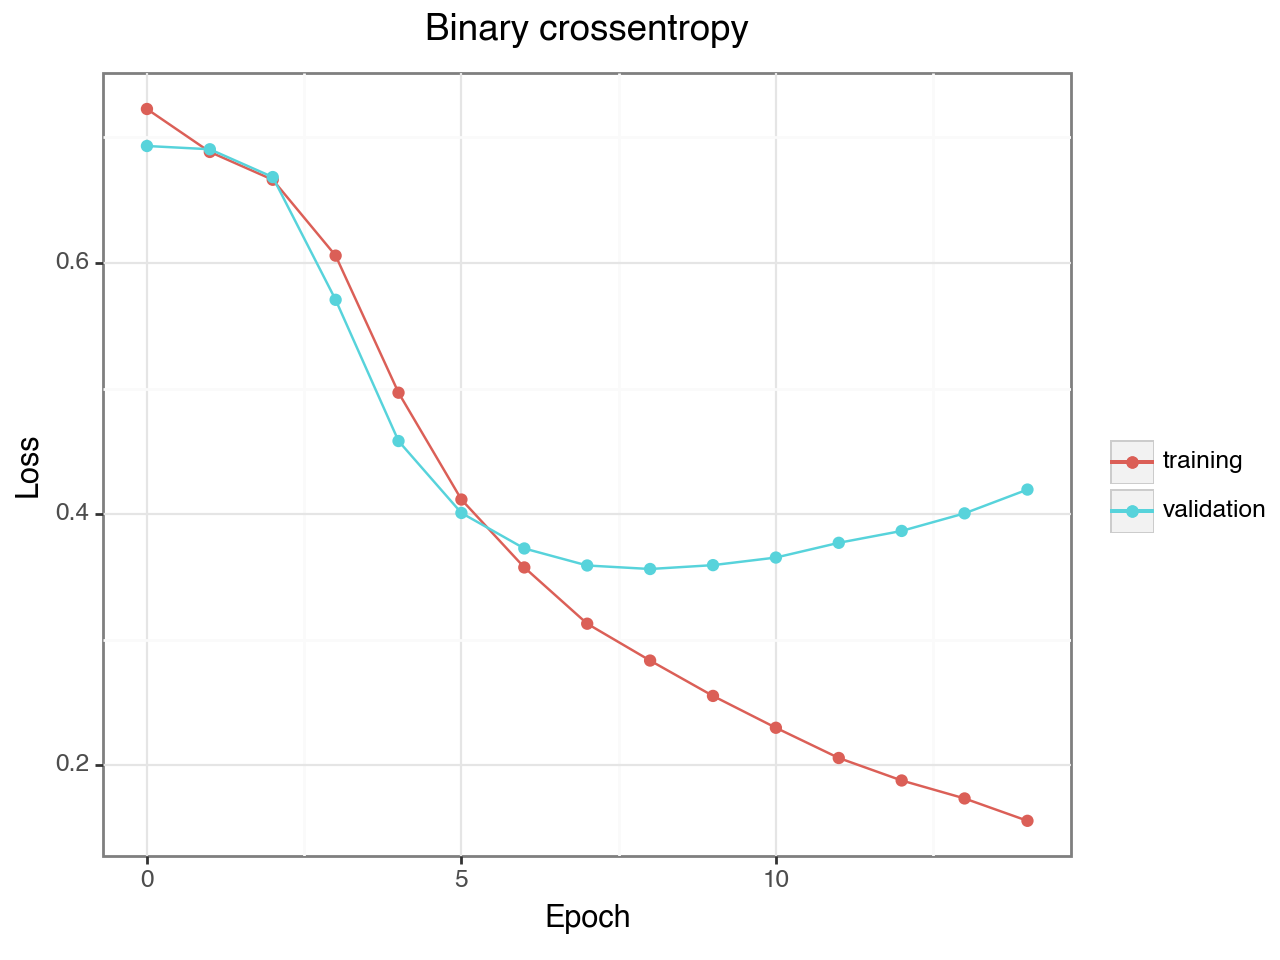

<Figure Size: (640 x 480)>

In [18]:
sc.plot

In [19]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'auc', 'color':"'training'"},
                 main_title='Area under curve',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))

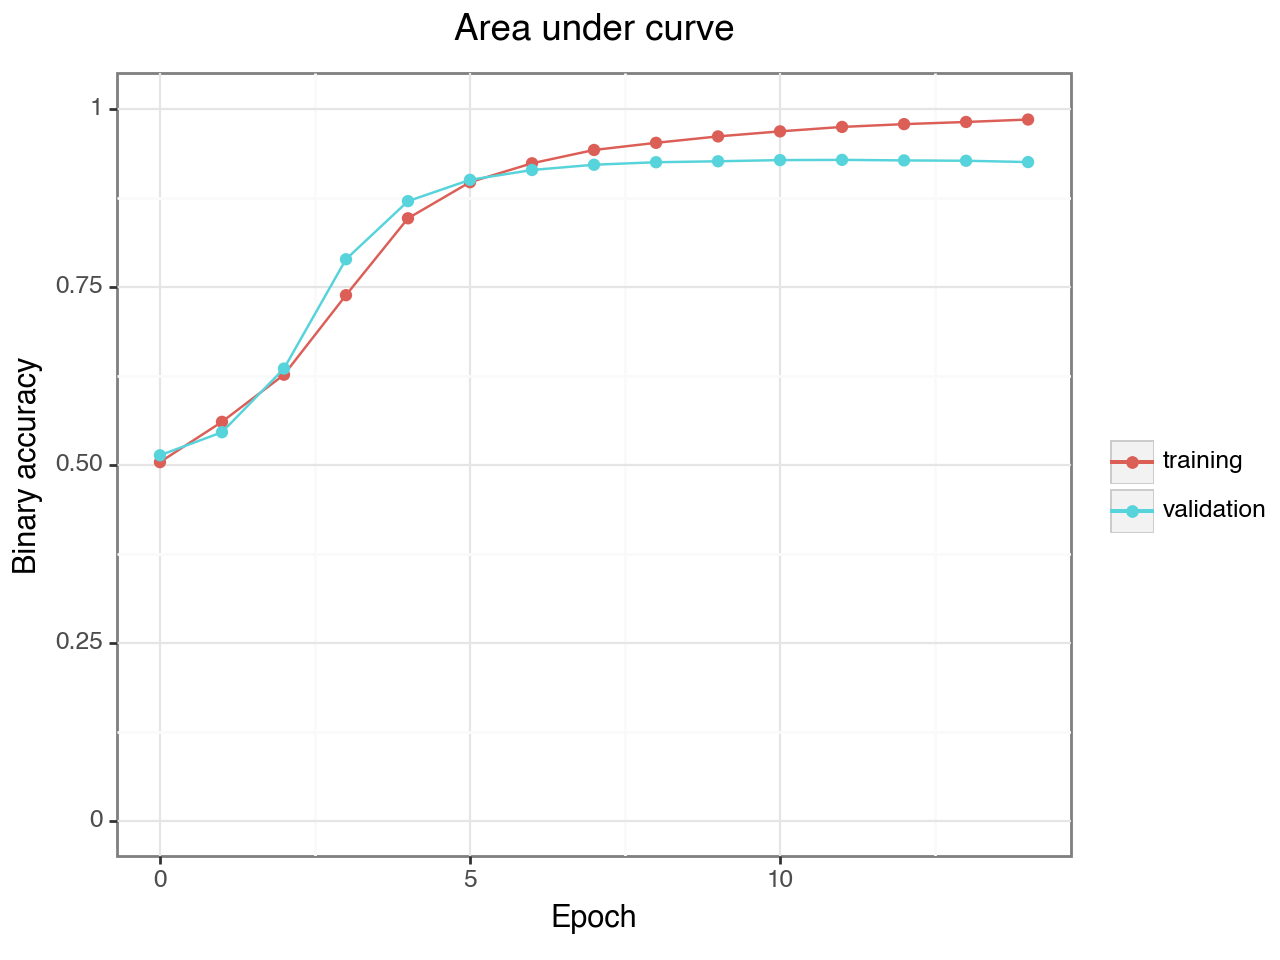

<Figure Size: (640 x 480)>

In [20]:
sc.plot + ylim(0,1)

In [21]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'binary_accuracy', 'color':"'training'"},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))

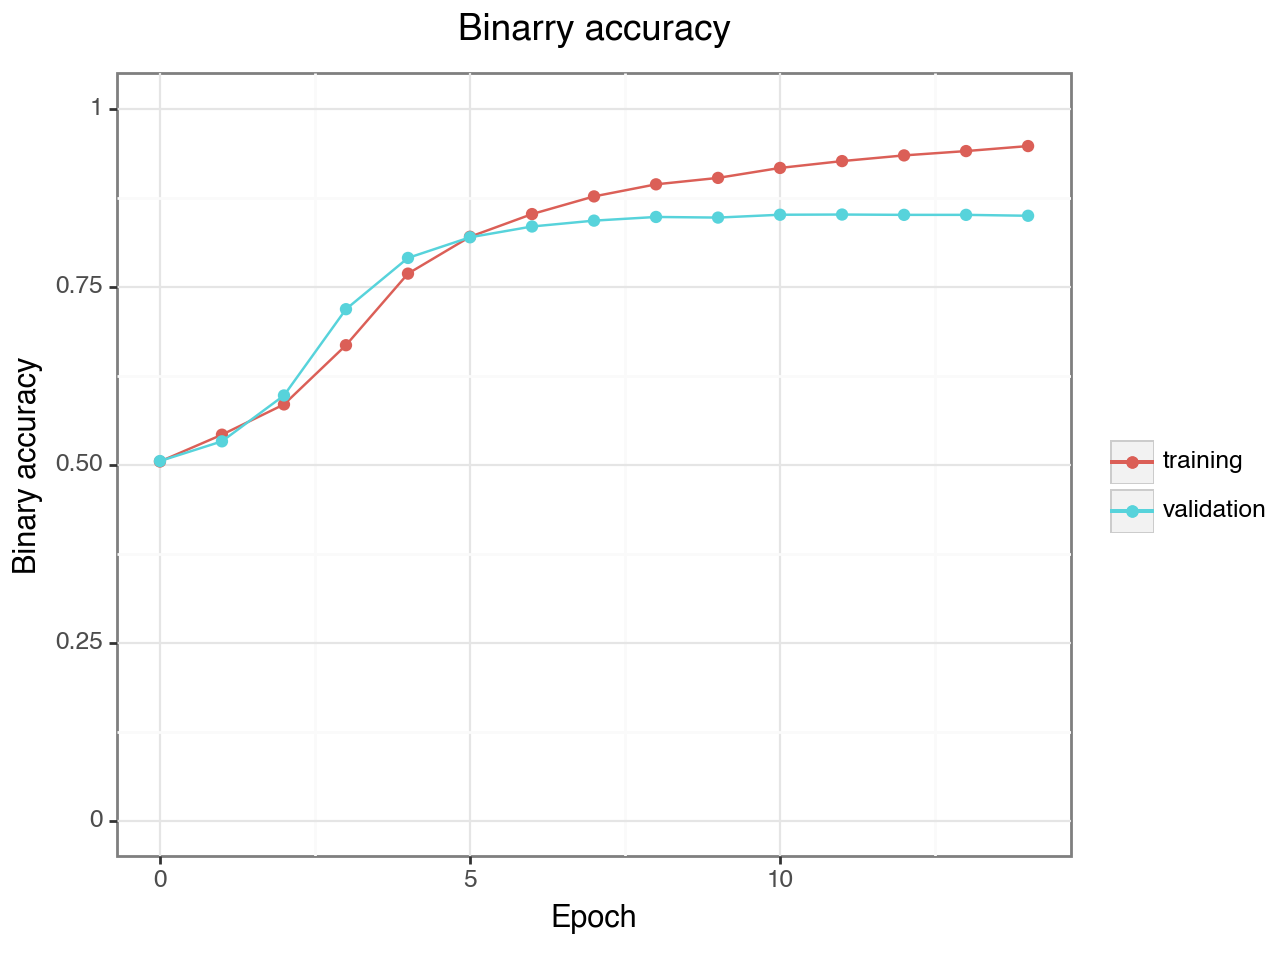

<Figure Size: (640 x 480)>

In [22]:
sc.plot + ylim(0,1)

# Extract embeddings

In [23]:
embedding_vectors = model.layers[0].weights[0]

In [24]:
token2vector = {}
for index, vector in enumerate(embedding_vectors):
    token2vector[index2token.get(str(index))] = vector.numpy()

In [25]:
token2vector_df = pd.DataFrame.from_dict({'token':list(token2vector.keys()), 'em_vector': list(token2vector.values())})

In [26]:
token2vector_df

,token,em_vector
0,aag,"[0.006673311, 0.0015260507, 0.0063979016, -0.0..."
1,aaron,"[0.01624132, -0.03650427, 0.027745264, 0.01592..."
2,ab,"[0.006468333, -0.03163215, 0.01702233, 0.00701..."
3,abandon,"[0.03237411, -0.02489456, -0.011211188, -0.053..."
4,abandoned,"[-0.00086087635, 0.017155446, 0.006263106, -0...."
...,...,...
17337,zu,"[-0.021632679, 0.004830862, 0.032604653, 0.004..."
17338,zucker,"[0.04477059, 0.027044876, -0.030222679, 0.0326..."
17339,zulu,"[0.01498618, 0.04494951, 0.0027486263, 0.04154..."
17340,zuniga,"[-0.0059550446, -0.0015327132, -0.0026701437, ..."


In [27]:
token2vector_tsne = pd.DataFrame.from_dict(token2vector, orient='index')

In [28]:
token2vector_tsne

,0,1,2,3,4,5,6,7
aag,0.006673,0.001526,0.006398,-0.011548,0.029131,0.024082,-0.011930,-0.000301
aaron,0.016241,-0.036504,0.027745,0.015925,-0.007550,-0.043807,-0.001275,-0.020106
ab,0.006468,-0.031632,0.017022,0.007011,0.035646,-0.020510,-0.004831,-0.005202
abandon,0.032374,-0.024895,-0.011211,-0.053163,0.034631,0.006825,-0.025369,0.042293
abandoned,-0.000861,0.017155,0.006263,-0.037626,0.048373,0.007858,0.052088,0.037053
...,...,...,...,...,...,...,...,...
zu,-0.021633,0.004831,0.032605,0.004067,-0.018150,-0.045053,-0.011336,0.004163
zucker,0.044771,0.027045,-0.030223,0.032622,-0.042471,-0.017407,-0.033326,-0.011746
zulu,0.014986,0.044950,0.002749,0.041545,0.007824,-0.022644,0.025471,0.000795
zuniga,-0.005955,-0.001533,-0.002670,-0.040831,-0.028105,0.020726,0.027437,-0.015783


In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne_transformer = TSNE(n_components=2, verbose=1, random_state=123)

In [31]:
z = tsne_transformer.fit_transform(token2vector_tsne) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17342 samples in 0.017s...
[t-SNE] Computed neighbors for 17342 samples in 3.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17342
[t-SNE] Computed conditional probabilities for sample 2000 / 17342
[t-SNE] Computed conditional probabilities for sample 3000 / 17342
[t-SNE] Computed conditional probabilities for sample 4000 / 17342
[t-SNE] Computed conditional probabilities for sample 5000 / 17342
[t-SNE] Computed conditional probabilities for sample 6000 / 17342
[t-SNE] Computed conditional probabilities for sample 7000 / 17342
[t-SNE] Computed conditional probabilities for sample 8000 / 17342
[t-SNE] Computed conditional probabilities for sample 9000 / 17342
[t-SNE] Computed conditional probabilities for sample 10000 / 17342
[t-SNE] Computed conditional probabilities for sample 11000 / 17342
[t-SNE] Computed conditional probabilities for sample 12000 / 17342
[t-SNE] Computed conditional probabilities for sam

In [32]:
token2vector_tsne['comp-0'] = z[:,0]
token2vector_tsne['comp-1'] = z[:,1]

In [33]:
list_of_animals = [animal.lower() for animal in pd.read_csv("/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/animals.csv").name.to_list()]

In [34]:
tsne_df = token2vector_tsne.sample(n=5000).reset_index()
# tsne_df = token2vector_tsne.reset_index()
tsne_df.rename(columns={'index':'token'}, inplace=True)
tsne_df['labels'] = 'background'
tsne_df.loc[[x in list_of_animals for x in tsne_df.token],['labels']]  = 'animals'

In [35]:
tsne_df

,token,0,1,2,3,4,5,6,7,comp-0,comp-1,labels
0,storyline,-0.077403,-0.000268,0.017766,0.025414,0.004923,-0.054068,0.022933,0.034987,-8.157884,-82.687187,background
1,painters,0.000618,0.008106,0.028600,0.012094,-0.010002,0.005632,0.034231,0.002179,-37.527466,48.062225,background
2,filthy,-0.023645,-0.008486,0.031889,-0.018153,-0.006241,0.037026,0.054014,-0.018507,-56.382584,59.168388,background
3,nearest,0.008216,0.019450,-0.015781,0.045488,0.038293,0.039208,-0.002097,-0.030320,-29.634235,7.955851,background
4,analyze,0.006515,0.048918,-0.032641,0.040955,-0.013473,0.038736,0.014449,-0.009459,-15.321282,60.478600,background
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,truffaut,0.032836,-0.019198,0.034972,0.019515,-0.026369,0.032848,0.031572,0.006081,-19.629354,71.085236,background
4996,attitudes,-0.000715,-0.036156,0.042125,0.039249,0.008105,-0.008617,0.037133,0.002395,-62.785652,-57.134018,background
4997,relegated,-0.044292,-0.028595,-0.026378,-0.029227,-0.045566,-0.011541,-0.027450,0.013398,63.603279,-13.065283,background
4998,picky,-0.029782,-0.018711,-0.023225,0.022200,0.006038,-0.035032,-0.042508,0.033667,51.517406,-40.468216,background


In [36]:
sc = ScatterPlot(data_set=tsne_df,
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'labels'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

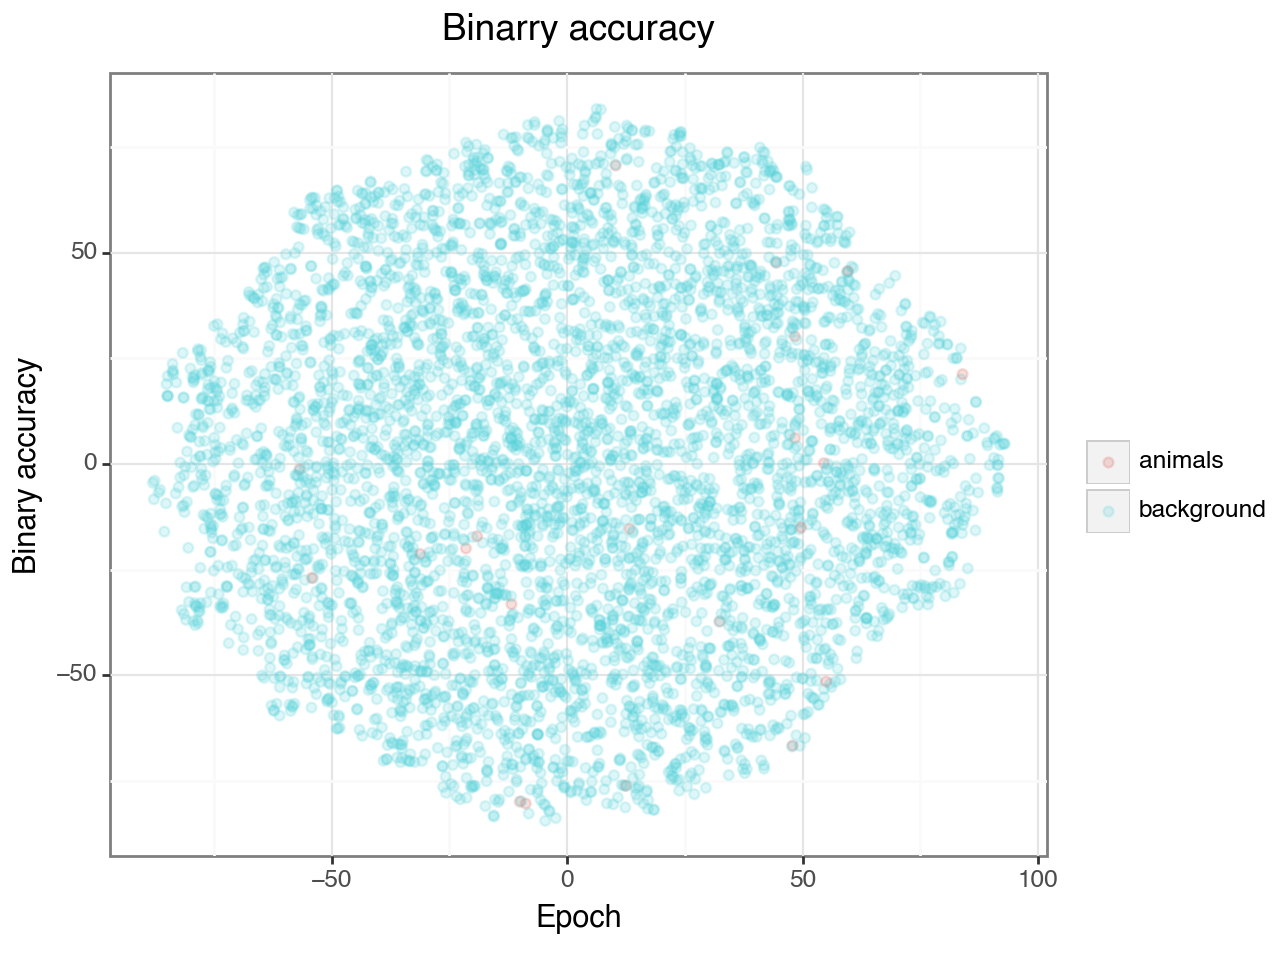

<Figure Size: (640 x 480)>

In [37]:
sc.plot

In [38]:
sc = ScatterPlot(data_set=tsne_df[tsne_df.labels == 'animals'],
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'token'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

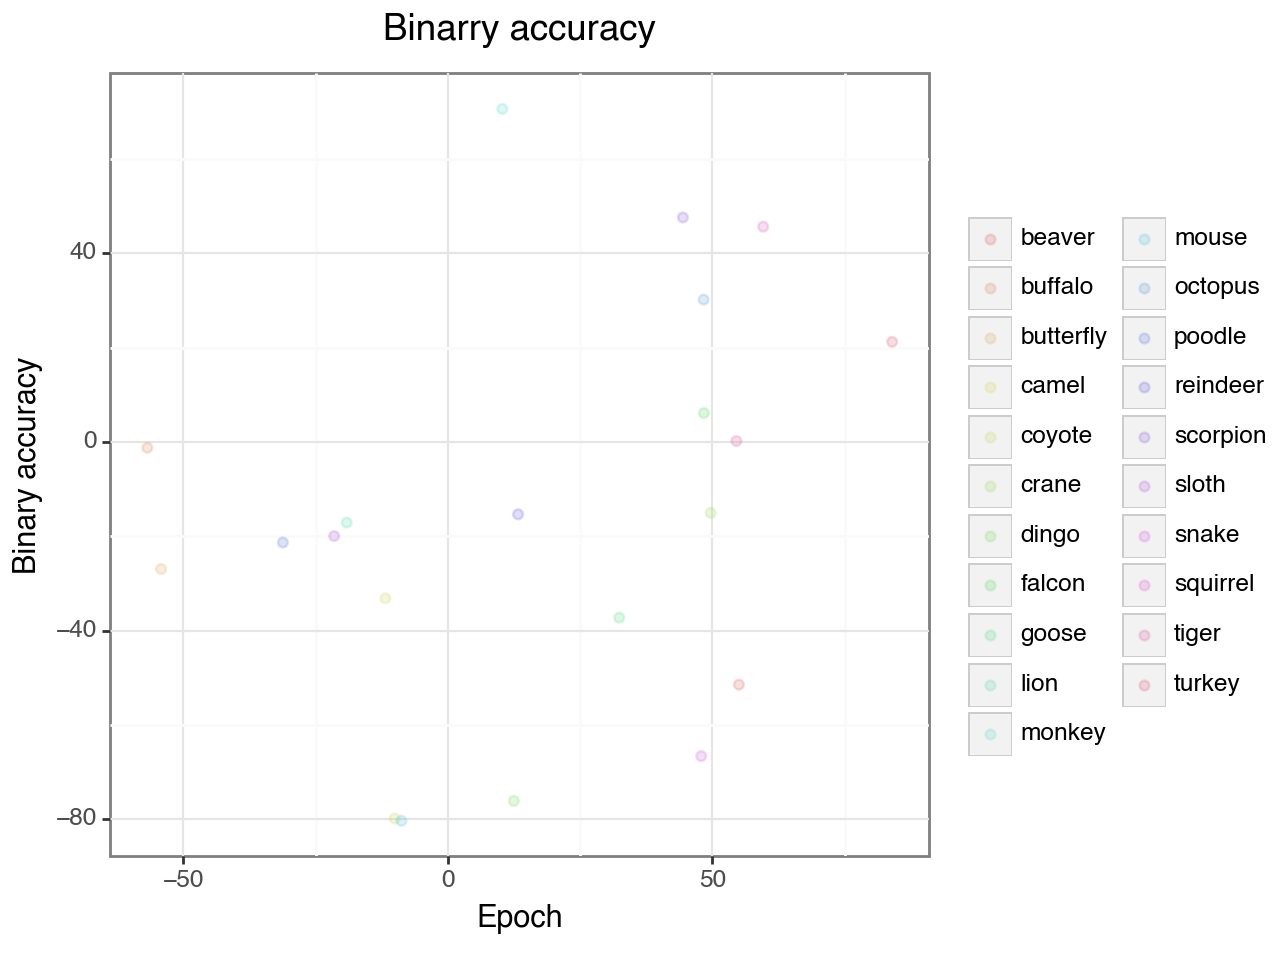

<Figure Size: (640 x 480)>

In [39]:
sc.plot